### BANK LOAN ANALYSIS REPORT

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
import plotly.express as px
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
df = pd.read_excel('financial_loan_data.xlsx')

In [10]:
df.head()
df.tail()

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,2021-02-11,2021-09-13,2021-04-13,...,C4,60 months,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,2021-01-01,2021-12-14,2021-01-15,...,E1,36 months,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,2021-01-05,2021-12-12,2021-01-09,...,C5,36 months,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522
3,1041756,TX,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,2021-02-25,2021-12-12,2021-03-12,...,B2,60 months,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911
4,1068350,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,2021-01-01,2021-12-14,2021-01-15,...,A1,36 months,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835


,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
38571,803452,NJ,INDIVIDUAL,< 1 year,Joseph M Sanzari Company,C,MORTGAGE,2021-07-11,2021-05-16,2021-05-16,...,C1,60 months,Verified,100000.0,0.1986,551.64,0.1299,24250,33,31946
38572,970377,NY,INDIVIDUAL,8 years,Swat Fame,C,RENT,2021-10-11,2021-04-16,2021-05-16,...,C1,60 months,Verified,50000.0,0.0458,579.72,0.1349,25200,18,31870
38573,875376,CA,INDIVIDUAL,5 years,Anaheim Regional Medical Center,D,RENT,2021-09-11,2021-05-16,2021-05-16,...,D5,60 months,Verified,65000.0,0.1734,627.93,0.1749,25000,20,35721
38574,972997,NY,INDIVIDUAL,5 years,Brooklyn Radiology,D,RENT,2021-10-11,2021-05-16,2021-05-16,...,D5,60 months,Verified,368000.0,0.0009,612.72,0.1825,24000,9,33677
38575,682952,NY,INDIVIDUAL,4 years,Allen Edmonds,F,RENT,2021-07-11,2021-05-16,2021-05-16,...,F3,60 months,Verified,80000.0,0.0600,486.86,0.2099,18000,7,27679


#### Metadata of data

In [13]:
print("No of Rows:",df.shape[0])
print("No of Columns:", df.shape[1])

No of Rows: 38576
No of Columns: 24


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38576 entries, 0 to 38575
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     38576 non-null  int64         
 1   address_state          38576 non-null  object        
 2   application_type       38576 non-null  object        
 3   emp_length             38576 non-null  object        
 4   emp_title              37138 non-null  object        
 5   grade                  38576 non-null  object        
 6   home_ownership         38576 non-null  object        
 7   issue_date             38576 non-null  datetime64[ns]
 8   last_credit_pull_date  38576 non-null  datetime64[ns]
 9   last_payment_date      38576 non-null  datetime64[ns]
 10  loan_status            38576 non-null  object        
 11  next_payment_date      38576 non-null  datetime64[ns]
 12  member_id              38576 non-null  int64         
 13  p

#### Data Types

In [16]:
df.dtypes

id                                int64
address_state                    object
application_type                 object
emp_length                       object
emp_title                        object
grade                            object
home_ownership                   object
issue_date               datetime64[ns]
last_credit_pull_date    datetime64[ns]
last_payment_date        datetime64[ns]
loan_status                      object
next_payment_date        datetime64[ns]
member_id                         int64
purpose                          object
sub_grade                        object
term                             object
verification_status              object
annual_income                   float64
dti                             float64
installment                     float64
int_rate                        float64
loan_amount                       int64
total_acc                         int64
total_payment                     int64
dtype: object

In [17]:
df.describe()

,id,issue_date,last_credit_pull_date,last_payment_date,next_payment_date,member_id,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
count,3.857600e+04,38576,38576,38576,38576,3.857600e+04,3.857600e+04,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000
mean,6.810371e+05,2021-07-16 02:31:35.562007040,2021-06-08 13:36:34.193280512,2021-06-26 09:52:08.909166080,2021-07-26 20:42:20.605557760,8.476515e+05,6.964454e+04,0.133274,326.862965,0.120488,11296.066855,22.132544,12263.348533
min,5.473400e+04,2021-01-01 00:00:00,2021-01-08 00:00:00,2021-01-08 00:00:00,2021-02-08 00:00:00,7.069900e+04,4.000000e+03,0.000000,15.690000,0.054200,500.000000,2.000000,34.000000
25%,5.135170e+05,2021-04-11 00:00:00,2021-04-15 00:00:00,2021-03-16 00:00:00,2021-04-16 00:00:00,6.629788e+05,4.150000e+04,0.082100,168.450000,0.093200,5500.000000,14.000000,5633.000000
50%,6.627280e+05,2021-07-11 00:00:00,2021-05-16 00:00:00,2021-06-14 00:00:00,2021-07-14 00:00:00,8.473565e+05,6.000000e+04,0.134200,283.045000,0.118600,10000.000000,20.000000,10042.000000
75%,8.365060e+05,2021-10-11 00:00:00,2021-08-13 00:00:00,2021-09-15 00:00:00,2021-10-15 00:00:00,1.045652e+06,8.320050e+04,0.185900,434.442500,0.145900,15000.000000,29.000000,16658.000000
max,1.077501e+06,2021-12-12 00:00:00,2022-01-20 00:00:00,2021-12-15 00:00:00,2022-01-15 00:00:00,1.314167e+06,6.000000e+06,0.299900,1305.190000,0.245900,35000.000000,90.000000,58564.000000
std,2.113246e+05,NaN,NaN,NaN,NaN,2.668105e+05,6.429368e+04,0.066662,209.092000,0.037164,7460.746022,11.392282,9051.104777


### Total Loan Application

In [18]:
Total_Loan_Application = df['id'].nunique()
print("Total Loan Application :",Total_Loan_Application)    

Total Loan Application : 38576


### MTD Total Loan Applications

In [23]:
latest_issue_date = df['issue_date'].max()
latest_year = latest_issue_date.year
latest_month = latest_issue_date.month


mtd_data = df[(df['issue_date'].dt.year == latest_year) & (df['issue_date'].dt.month == latest_month)]

mtd_loan_application = mtd_data['id'].count()

print(f"MTD Loan Applications (for {latest_issue_date.strftime('%B %Y')}) :{mtd_loan_application}")

MTD Loan Applications (for December 2021) :4314


### Total Funded Amount

In [29]:
total_funded_amount = df['loan_amount'].sum()
totat_funded_amount_millions = total_funded_amount/1000000
print(f'Total Funded Amount : ${totat_funded_amount_millions:.2f}M.')

Total Funded Amount : $435.76M.


### MTD Total Funded Amount

In [41]:
latest_issue_date = df['issue_date'].max()
latest_year = latest_issue_date.year
latest_month= latest_issue_date.month

mtd_fund = df[(df['issue_date'].dt.year == latest_year) & (df['issue_date'].dt.month == latest_month)]


mtd_fund_amount = mtd_fund['loan_amount'].sum()
mtd_fund_amount_miilion = mtd_fund_amount/1000000

print(f"MTD Total Funded Amount (for {latest_issue_date.strftime('%B %Y')}) : ${mtd_fund_amount_miilion:.2f}M")

MTD Total Funded Amount (for December 2021) : $53.98M


### Total Amount Received 

In [36]:
total_amount_received = df['total_payment'].sum()
total_amount_received_million = total_amount_received/1000000
print(f'Total Amount Received : ${total_amount_received_million:.2f}M')

Total Amount Received : $473.07M


### MTD Total Amount Received 

In [40]:
latest_issue_date = df['issue_date'].max()
latest_year = latest_issue_date.year
latest_month = latest_issue_date.month

mtd_received = df[(df['issue_date'].dt.year == latest_year) & (df['issue_date'].dt.month == latest_month)]

mtd_received_amount = mtd_received['total_payment'].sum()
mtd_received_amount_million = mtd_received_amount/1000000

print(f"MTD Total Amount Received (for {latest_issue_date.strftime('%B %Y')}): ${mtd_received_amount_million:.2f}M")

MTD Total Amount Received (for December 2021): $58.07M


### Average Interest Rate

In [46]:
avg_interest_rate = df['int_rate'].mean()*100
print(f'Average Interest Rate : {avg_interest_rate:.2f}%')

Average Interest Rate : 12.05%


### Average DTI

In [47]:
avg_dti = df['dti'].mean()*100
print(f'Average DTI : {avg_dti:.2f}%')

Average DTI : 13.33%


### Good Loan Metrics

In [64]:
# df[(df['loan_status'] == 'Fully Paid') | (df['loan_status'] == 'Current')]
good_loans = df[df['loan_status'].isin(['Fully Paid', 'Current'])]

total_loan_applications = df['id'].count()

good_loan_applications = good_loans['id'].count()
good_loan_funded_amount = good_loans['loan_amount'].sum()
good_loan_received_amount = good_loans['total_payment'].sum()

good_loan_funded_amount_millions = good_loan_funded_amount/1000000
good_loan_received_amount_millions = good_loan_received_amount/1000000

good_loan_percentage = (good_loan_applications/ total_loan_applications)*100


print(f" Good Loan Applications : {good_loan_applications}")
print(f" Good Loan Received Amount (in Millions) : ${good_loan_funded_amount_millions:.2f}M")
print(f" Good Loan Funded Amount  (in Millions): ${good_loan_received_amount_millions:.2f}M")
print(f" Percentage of Good Loan Applications: ${good_loan_percentage:.2f}%")


 Good Loan Applications : 33243
 Good Loan Received Amount (in Millions) : $370.22M
 Good Loan Funded Amount  (in Millions): $435.79M
 Percentage of Good Loan Applications: $86.18%


### Bad Loan Metrics

In [63]:
bad_loans = df[df['loan_status'].isin(['Charged Off'])]

total_loan_applications = df['id'].count()

bad_loan_applications = bad_loans['id'].count()
bad_loan_funded_amount = bad_loans['loan_amount'].sum()
bad_loan_received_amount = bad_loans['total_payment'].sum()

bad_loan_funded_amount_millions = bad_loan_funded_amount/1000000
bad_loan_received_amount_millions = bad_loan_received_amount/1000000

bad_loan_percentage = (bad_loan_applications/ total_loan_applications)*100


print(f" Bad Loan Applications : {bad_loan_applications}")
print(f" Bad Loan Received Amount : ${bad_loan_funded_amount_millions:.2f}M")
print(f" Bad Loan Funded Amount : ${bad_loan_received_amount_millions:.2f}M")
print(f" Percentage of Bad Loan Applications: ${bad_loan_percentage:.2f}%")

 Bad Loan Applications : 5333
 Bad Loan Received Amount : $65.53M
 Bad Loan Funded Amount : $37.28M
 Percentage of Bad Loan Applications: $13.82%


### Monthly Trends by Issue Date for Total Funded Amount

<Figure size 1000x500 with 0 Axes>

Text(0, 25.13165, '$25.03')

Text(1, 24.747825000000002, '$24.65')

Text(2, 28.9757, '$28.88')

Text(3, 29.9008, '$29.80')

Text(4, 31.838350000000002, '$31.74')

Text(5, 34.261475000000004, '$34.16')

Text(6, 35.9139, '$35.81')

Text(7, 38.2496, '$38.15')

Text(8, 41.007725, '$40.91')

Text(9, 44.9938, '$44.89')

Text(10, 47.854825, '$47.75')

Text(11, 54.081425, '$53.98')

Text(0.5, 1.0, 'Total Fund Amount by Month')

Text(0.5, 0, 'Month')

Text(0, 0.5, 'Funded Amount (₹ Millions)')

([<matplotlib.axis.XTick at 0x1f3a3778f50>,
 [Text(0, 0, 'Jan 2021'),
  Text(1, 0, 'Feb 2021'),
  Text(2, 0, 'Mar 2021'),
  Text(3, 0, 'Apr 2021'),
  Text(4, 0, 'May 2021'),
  Text(5, 0, 'Jun 2021'),
  Text(6, 0, 'Jul 2021'),
  Text(7, 0, 'Aug 2021'),
  Text(8, 0, 'Sep 2021'),
  Text(9, 0, 'Oct 2021'),
  Text(10, 0, 'Nov 2021'),
  Text(11, 0, 'Dec 2021')])

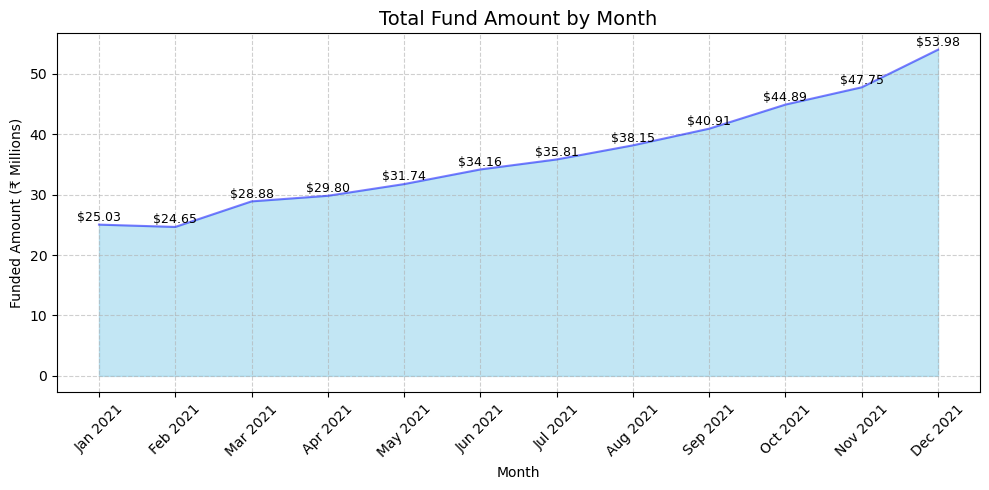

In [26]:
monthly_funded = (
    df.sort_values('issue_date')
      .assign(month_name=lambda x: x['issue_date'].dt.strftime("%b %Y"))
      .groupby('month_name', sort=False)['loan_amount']
      .sum()
      .div(1000000)
      .reset_index(name='loan_amount_millions')
)


plt.figure(figsize = (10,5)) 
plt.fill_between(monthly_funded['month_name'],monthly_funded['loan_amount_millions'], color = 'skyblue', alpha=0.5)

plt.plot(monthly_funded['month_name'],monthly_funded['loan_amount_millions'],color = 'blue',alpha =0.5)

for i , row in monthly_funded.iterrows():
    plt.text(i,row['loan_amount_millions'] +0.1, f"${row['loan_amount_millions']:.2f}", 
    ha='center', va ='bottom', fontsize = 9, rotation =0,color = 'black')

# Formatting
plt.title('Total Fund Amount by Month',fontsize = 14) 
plt.xlabel('Month') 
plt.ylabel('Funded Amount (₹ Millions)') 
plt.xticks(ticks = range(len(monthly_funded)),labels= monthly_funded['month_name'], rotation=45)
plt.grid(True, linestyle='--',alpha = 0.6) 
plt.tight_layout() 
plt.show()



[Text(0, 3, '$25.03'),
 Text(0, 3, '$24.65'),
 Text(0, 3, '$28.88'),
 Text(0, 3, '$29.80'),
 Text(0, 3, '$31.74'),
 Text(0, 3, '$34.16'),
 Text(0, 3, '$35.81'),
 Text(0, 3, '$38.15'),
 Text(0, 3, '$40.91'),
 Text(0, 3, '$44.89'),
 Text(0, 3, '$47.75'),
 Text(0, 3, '$53.98')]

Text(0.5, 1.0, 'Total Fund Amount by Month')

Text(0.5, 0, 'Month')

Text(0, 0.5, 'Funded Amount (₹ Millions)')

[Text(0, 0, 'Jan 2021'),
 Text(1, 0, 'Feb 2021'),
 Text(2, 0, 'Mar 2021'),
 Text(3, 0, 'Apr 2021'),
 Text(4, 0, 'May 2021'),
 Text(5, 0, 'Jun 2021'),
 Text(6, 0, 'Jul 2021'),
 Text(7, 0, 'Aug 2021'),
 Text(8, 0, 'Sep 2021'),
 Text(9, 0, 'Oct 2021'),
 Text(10, 0, 'Nov 2021'),
 Text(11, 0, 'Dec 2021')]

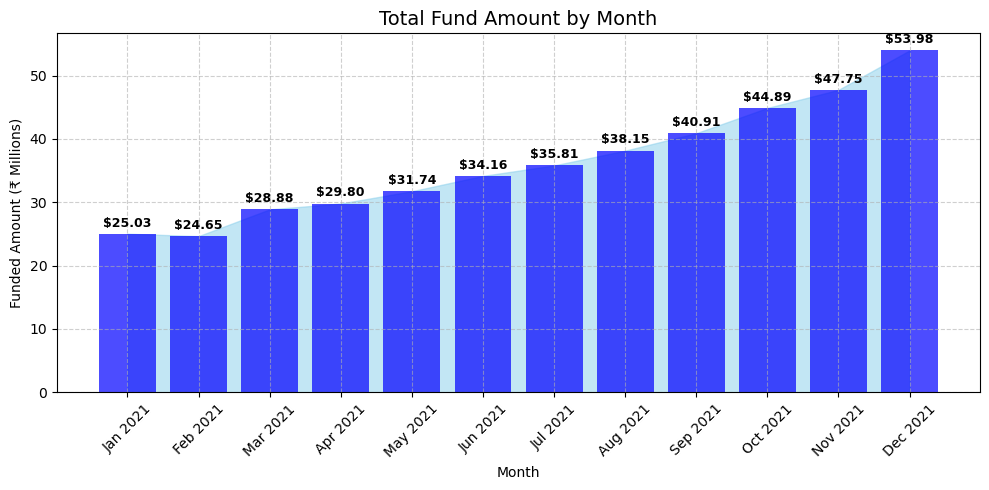

In [12]:
monthly_funded = (
    df.sort_values('issue_date')
      .assign(month_name=lambda x: x['issue_date'].dt.strftime("%b %Y"))
      .groupby('month_name', sort=False)['loan_amount']
      .sum()
      .div(1000000)
      .reset_index(name='loan_amount_millions')
)


plt.figure(figsize = (10,5))
plt.fill_between(monthly_funded['month_name'],monthly_funded['loan_amount_millions'], color = 'skyblue', alpha=0.5)
plt.plot(monthly_funded['month_name'], monthly_funded['loan_amount_millions'], color='blue',linewidth = 2)

# 👇 Ye line automatic value labels add karegi
ax = Monthly_funded.plot(kind='bar', x='month', y='loan_amount_millions', legend=False)
ax.bar_label(ax.containers[0], fmt='$%.2f', label_type='edge', padding=3, fontsize=9, fontweight='bold', color='black')

plt.title('Total Fund Amount by Month',fontsize = 14)
plt.xlabel('Month')
plt.ylabel('Funded Amount (₹ Millions)')
plt.xticks(ticks = range(len(monthly_funded)),labels= mothly_funded['month_name'], rotation=45)
plt.grid(True, linestyle='--',alpha = 0.6)


### Monthly Trends by Issue Date for Total Amount Received

<Figure size 1000x600 with 0 Axes>

Text(0, 27.678836, '$27.58')

Text(1, 27.817745000000002, '$27.72')

Text(2, 32.3644, '$32.26')

Text(3, 32.595533, '$32.50')

Text(4, 33.850523, '$33.75')

Text(5, 36.264533, '$36.16')

Text(6, 38.92722, '$38.83')

Text(7, 42.782218, '$42.68')

Text(8, 44.083948, '$43.98')

Text(9, 49.499567, '$49.40')

Text(10, 50.23203, '$50.13')

Text(11, 58.17438, '$58.07')

Text(0.5, 1.0, 'Total Received Amount by Month')

Text(0.5, 0, 'Month')

Text(0, 0.5, 'Received Amount ($ Millions)')

([<matplotlib.axis.XTick at 0x1f3a462cb90>,
 [Text(0, 0, 'Jan 2021'),
  Text(1, 0, 'Feb 2021'),
  Text(2, 0, 'Mar 2021'),
  Text(3, 0, 'Apr 2021'),
  Text(4, 0, 'May 2021'),
  Text(5, 0, 'Jun 2021'),
  Text(6, 0, 'Jul 2021'),
  Text(7, 0, 'Aug 2021'),
  Text(8, 0, 'Sep 2021'),
  Text(9, 0, 'Oct 2021'),
  Text(10, 0, 'Nov 2021'),
  Text(11, 0, 'Dec 2021')])

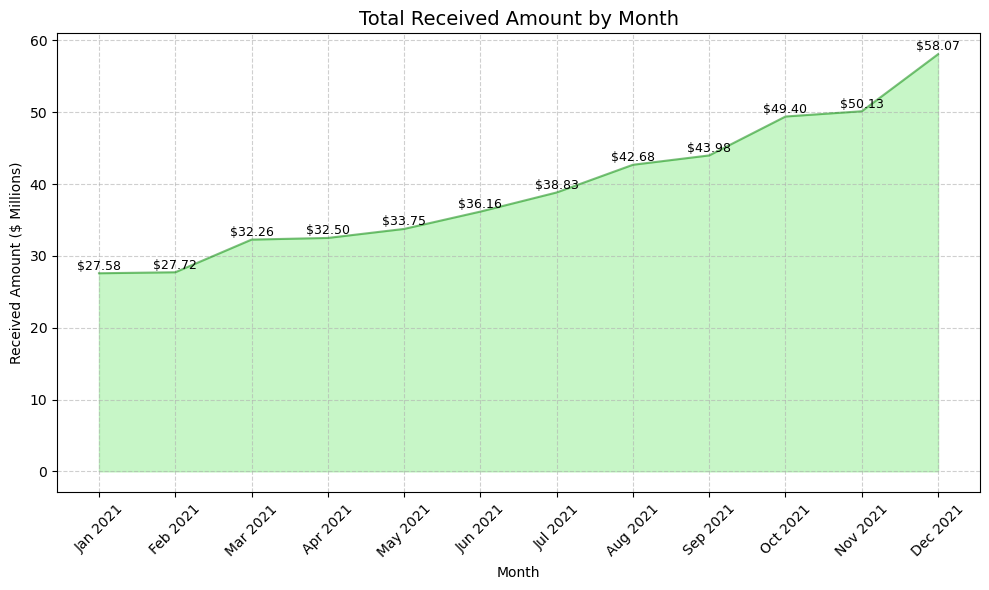

In [31]:
monthly_received= (
    df.sort_values('issue_date')
      .assign(month_name=lambda x: x['issue_date'].dt.strftime("%b %Y"))
      .groupby('month_name', sort=False)['total_payment']
      .sum()
      .div(1000000)
      .reset_index(name='received_amount_millions')
)


plt.figure(figsize = (10,6)) 
plt.fill_between(monthly_received['month_name'],monthly_received['received_amount_millions'], color = 'lightgreen', alpha=0.5)

plt.plot(monthly_received['month_name'],monthly_received['received_amount_millions'],color = 'green',alpha =0.5)

for i , row in monthly_received.iterrows():
    plt.text(i,row['received_amount_millions'] +0.1, f"${row['received_amount_millions']:.2f}", 
    ha='center', va ='bottom', fontsize = 9, rotation =0,color = 'black')

# Formatting
plt.title('Total Received Amount by Month',fontsize = 14) 
plt.xlabel('Month') 
plt.ylabel('Received Amount ($ Millions)') 
plt.xticks(ticks = range(len(monthly_received)),labels= monthly_funded['month_name'], rotation=45)
plt.grid(True, linestyle='--',alpha = 0.6) 
plt.tight_layout() 
plt.show()




### Monthly Trends by Issue Date for Total Loan Applications

<Figure size 1000x500 with 0 Axes>

Text(0, 2332.1, '2332')

Text(1, 2279.1, '2279')

Text(2, 2627.1, '2627')

Text(3, 2755.1, '2755')

Text(4, 2911.1, '2911')

Text(5, 3184.1, '3184')

Text(6, 3366.1, '3366')

Text(7, 3441.1, '3441')

Text(8, 3536.1, '3536')

Text(9, 3796.1, '3796')

Text(10, 4035.1, '4035')

Text(11, 4314.1, '4314')

Text(0.5, 1.0, 'Total Applications by Month')

Text(0.5, 0, 'Month')

Text(0, 0.5, 'Total Applications')

([<matplotlib.axis.XTick at 0x1f3a47df4d0>,
 [Text(0, 0, 'Jan 2021'),
  Text(1, 0, 'Feb 2021'),
  Text(2, 0, 'Mar 2021'),
  Text(3, 0, 'Apr 2021'),
  Text(4, 0, 'May 2021'),
  Text(5, 0, 'Jun 2021'),
  Text(6, 0, 'Jul 2021'),
  Text(7, 0, 'Aug 2021'),
  Text(8, 0, 'Sep 2021'),
  Text(9, 0, 'Oct 2021'),
  Text(10, 0, 'Nov 2021'),
  Text(11, 0, 'Dec 2021')])

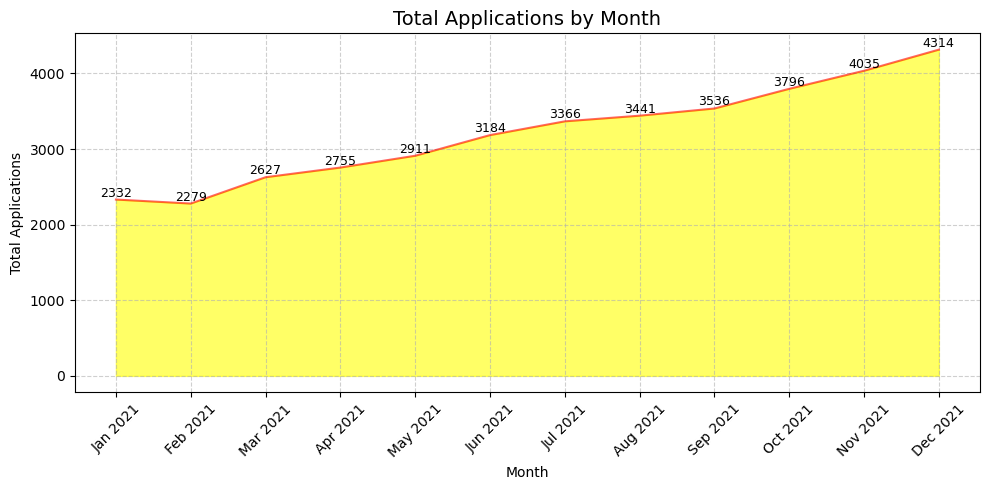

In [40]:
monthly_applications = (
    df.sort_values('issue_date')
      .assign(month_name=lambda x: x['issue_date'].dt.strftime("%b %Y"))
      .groupby('month_name', sort=False)['id']
      .count()
      .reset_index(name='total_application')
)

plt.figure(figsize=(10, 5))

# Area chart
plt.fill_between(
    monthly_applications.index,
    monthly_applications['total_application'],
    color='yellow',
    alpha=0.6
)

# Line chart
plt.plot(
    monthly_applications.index,
    monthly_applications['total_application'],
    color='red',
    alpha=0.6
)

# Add values above points
for i, row in monthly_applications.iterrows():
    plt.text(
        i,
        row['total_application'] + 0.1,
        f"{row['total_application']}",
        ha='center',
        va='bottom',
        fontsize=9,
        rotation=0,
        color='black'
    )

# Formatting
plt.title('Total Applications by Month', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Total Applications')

plt.xticks(
    ticks=monthly_applications.index,
    labels=monthly_applications['month_name'],
    rotation=45
)

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### Regional Anlaysis by State for Total Funded Amount

<Figure size 1000x800 with 0 Axes>

Text(19.2, 0.0, '$9K')

Text(41.7, 1.0, '$32K')

Text(66.45, 2.0, '$56K')

Text(69.75, 3.0, '$60K')

Text(96.225, 4.0, '$86K')

Text(149.125, 5.0, '$139K')

Text(172.175, 6.0, '$162K')

Text(514.1, 7.0, '$504K')

Text(616.15, 8.0, '$606K')

Text(839.525, 9.0, '$830K')

Text(900.75, 10.0, '$891K')

Text(1041.8, 11.0, '$1032K')

Text(1148.1, 12.0, '$1138K')

Text(1840.525, 13.0, '$1831K')

Text(1860.525, 14.0, '$1851K')

Text(1893.025, 15.0, '$1883K')

Text(1926.775, 16.0, '$1917K')

Text(1927.9, 17.0, '$1918K')

Text(2539.7, 18.0, '$2530K')

Text(2662.35, 19.0, '$2652K')

Text(2859.225, 20.0, '$2849K')

Text(2882.325, 21.0, '$2872K')

Text(3375.725, 22.0, '$3366K')

Text(3514.1, 23.0, '$3504K')

Text(4508.9, 24.0, '$4499K')

Text(4730.15, 25.0, '$4720K')

Text(4959.225, 26.0, '$4949K')

Text(5080.45, 27.0, '$5070K')

Text(5090.475, 28.0, '$5080K')

Text(5317.375, 29.0, '$5307K')

Text(6312.6, 30.0, '$6303K')

Text(7161.175, 31.0, '$7151K')

Text(7839.9, 32.0, '$7830K')

Text(8445.575, 33.0, '$8436K')

Text(8797.575, 34.0, '$8788K')

Text(8865.525, 35.0, '$8856K')

Text(8986.0, 36.0, '$8976K')

Text(9216.0, 37.0, '$9206K')

Text(11921.4, 38.0, '$11911K')

Text(13001.375, 39.0, '$12991K')

Text(15061.0, 40.0, '$15051K')

Text(15490.325, 41.0, '$15480K')

Text(15836.525, 42.0, '$15827K')

Text(15992.65, 43.0, '$15983K')

Text(17134.225, 44.0, '$17124K')

Text(21667.475, 45.0, '$21657K')

Text(30056.125, 46.0, '$30046K')

Text(31246.65, 47.0, '$31237K')

Text(42087.05, 48.0, '$42077K')

Text(78494.125, 49.0, '$78484K')

Text(0.5, 1.0, 'Total Funded Amount by State (in $ Thousands)')

Text(0.5, 0, 'Funded Amount')

Text(0, 0.5, 'State')

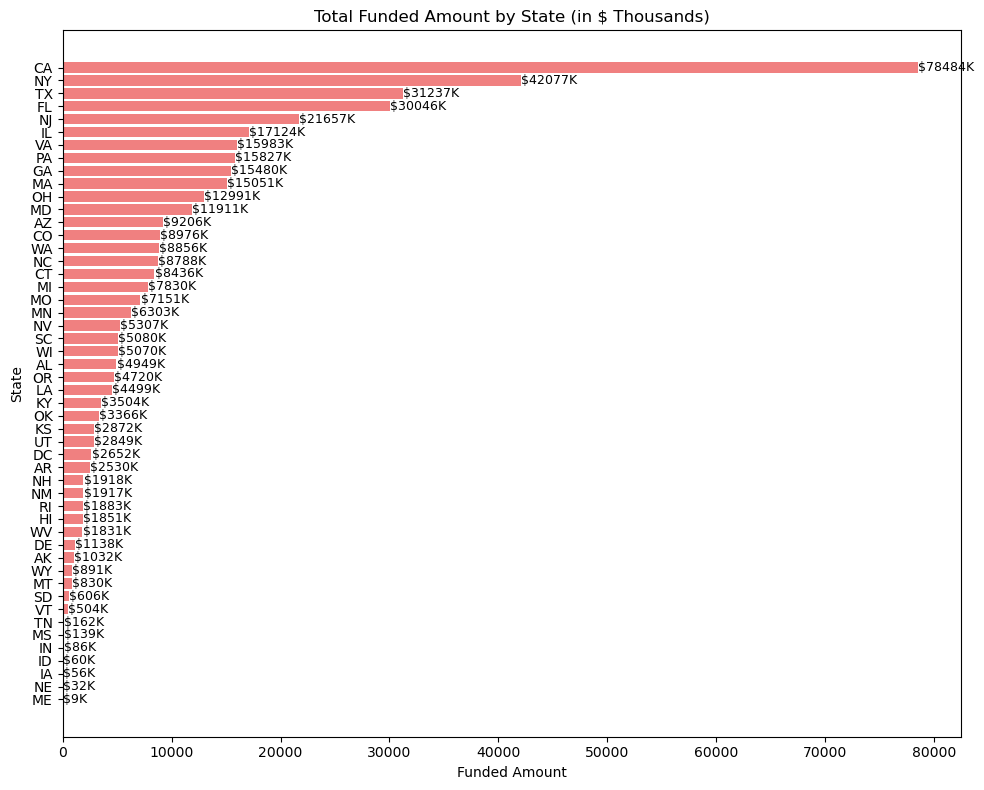

In [67]:
state_funding = df.groupby('address_state')['loan_amount'].sum().sort_values(ascending = True)
state_funding_thousands = state_funding/1000

plt.figure(figsize=(10,8))
bars = plt.barh(state_funding_thousands.index, state_funding_thousands.values, color = 'lightcoral')

for bar in bars:
    width = bar.get_width()
    plt.text(width +10, bar.get_y() + bar.get_height()/2, 
             f'${width:.0f}K', va='center', fontsize = 9)    

plt.title("Total Funded Amount by State (in $ Thousands)")
plt.xlabel("Funded Amount")
plt.ylabel("State")
plt.tight_layout()
plt.show()

### Regional Anlaysis by State for Total Received Amount

<Figure size 1000x800 with 0 Axes>

Text(20.808, 0.0, '$11K')

Text(34.542, 1.0, '$25K')

Text(74.482, 2.0, '$64K')

Text(75.329, 3.0, '$65K')

Text(95.521, 4.0, '$86K')

Text(151.522, 5.0, '$142K')

Text(159.342, 6.0, '$149K')

Text(544.973, 7.0, '$535K')

Text(666.514, 8.0, '$657K')

Text(902.047, 9.0, '$892K')

Text(1056.05, 10.0, '$1046K')

Text(1118.57, 11.0, '$1109K')

Text(1279.136, 12.0, '$1269K')

Text(2001.936, 13.0, '$1992K')

Text(2011.774, 14.0, '$2002K')

Text(2090.184, 15.0, '$2080K')

Text(2094.485, 16.0, '$2084K')

Text(2111.386, 17.0, '$2101K')

Text(2787.875, 18.0, '$2778K')

Text(2931.854, 19.0, '$2922K')

Text(2962.412, 20.0, '$2952K')

Text(3257.394, 21.0, '$3247K')

Text(3722.649, 22.0, '$3713K')

Text(3802.53, 23.0, '$3793K')

Text(4976.903, 24.0, '$4967K')

Text(5011.16, 25.0, '$5001K')

Text(5461.443, 26.0, '$5451K')

Text(5472.458, 27.0, '$5462K')

Text(5495.161, 28.0, '$5485K')

Text(5502.272, 29.0, '$5492K')

Text(6760.746, 30.0, '$6751K')

Text(7702.732, 31.0, '$7693K')

Text(8553.66, 32.0, '$8544K')

Text(9367.612, 33.0, '$9358K')

Text(9541.739, 34.0, '$9532K')

Text(9544.813, 35.0, '$9535K')

Text(9855.81, 36.0, '$9846K')

Text(10051.986, 37.0, '$10042K')

Text(12995.17, 38.0, '$12985K')

Text(14340.148, 39.0, '$14330K')

Text(16686.279, 40.0, '$16676K')

Text(16738.04, 41.0, '$16728K')

Text(17472.908, 42.0, '$17463K')

Text(17721.443, 43.0, '$17711K')

Text(18885.941, 44.0, '$18876K')

Text(23435.159, 45.0, '$23425K')

Text(31611.905, 46.0, '$31602K')

Text(34402.715, 47.0, '$34393K')

Text(46118.181, 48.0, '$46108K')

Text(83911.234, 49.0, '$83901K')

Text(0.5, 1.0, 'Total Received Amount by State (in $ Thousands)')

Text(0.5, 0, 'Received Amount')

Text(0, 0.5, 'State')

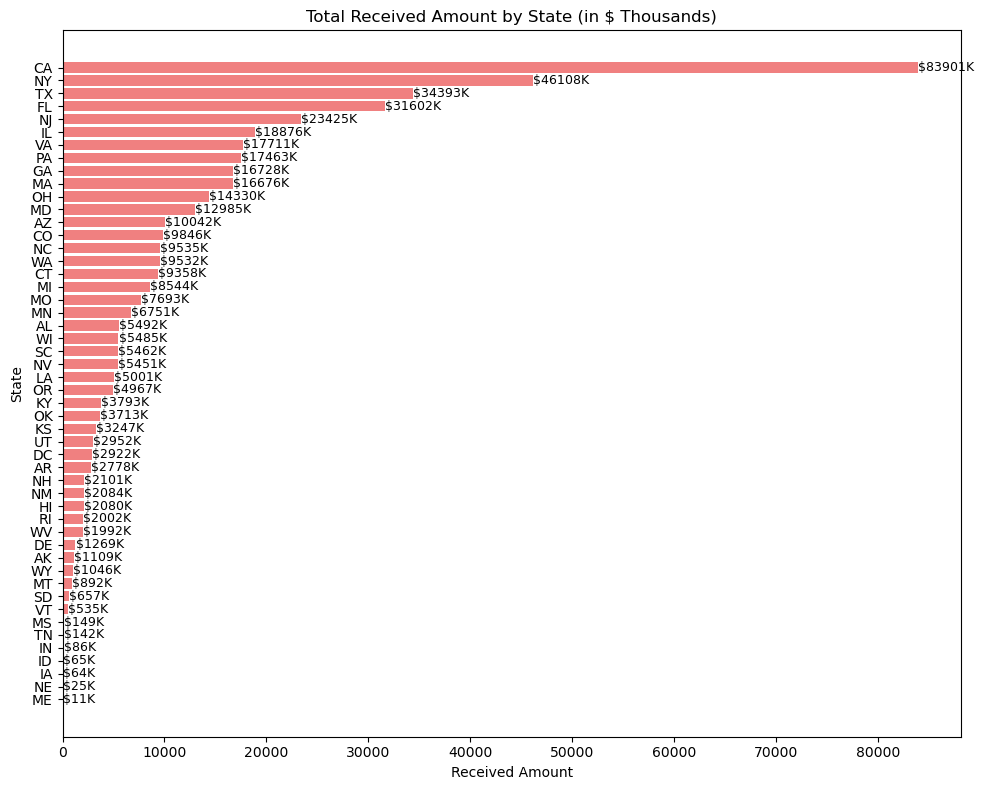

In [73]:
state_received = df.groupby('address_state')['total_payment'].sum().sort_values(ascending = True)
state_received_thousands = state_received/1000

plt.figure(figsize=(10,8))
bars = plt.barh(state_received_thousands.index, state_received_thousands.values, color = 'lightcoral')

for bar in bars:
    width = bar.get_width()
    plt.text(width +10, bar.get_y() + bar.get_height()/2, 
             f'${width:.0f}K', va='center', fontsize = 9)    

plt.title("Total Received Amount by State (in $ Thousands)")
plt.xlabel("Received Amount")
plt.ylabel("State")
plt.tight_layout()
plt.show()

### Regional Anlaysis by State for Total Received Amount

<Figure size 1000x800 with 0 Axes>

Text(18.371215263376193, 0.0, '17.87%')

Text(10.094048112816258, 1.0, '9.59%')

Text(7.6884072998755695, 2.0, '7.19%')

Text(7.40584819576939, 3.0, '6.91%')

Text(5.22314392368312, 4.0, '4.72%')

Text(4.352136043135628, 5.0, '3.85%')

Text(4.34176690170054, 6.0, '3.84%')

Text(4.064392368311903, 7.0, '3.56%')

Text(4.012546661136458, 8.0, '3.51%')

Text(3.895893819991705, 9.0, '3.40%')

Text(3.579635006221485, 10.0, '3.08%')

Text(3.1622770634591455, 11.0, '2.66%')

Text(2.6593737038573204, 12.0, '2.16%')

Text(2.5867897138116964, 13.0, '2.09%')

Text(2.496059726254666, 14.0, '2.00%')

Text(2.4675445873081707, 15.0, '1.97%')

Text(2.392368311903774, 16.0, '1.89%')

Text(2.275715470759021, 17.0, '1.78%')

Text(2.2109083367897138, 18.0, '1.71%')

Text(2.034632932393198, 19.0, '1.53%')

Text(1.7494815429282455, 20.0, '1.25%')

Text(1.7028204064703443, 21.0, '1.20%')

Text(1.656159270012443, 22.0, '1.16%')

Text(1.63023641642472, 23.0, '1.13%')

Text(1.6198672749896308, 24.0, '1.12%')

Text(1.604313562836997, 25.0, '1.10%')

Text(1.329531314807134, 26.0, '0.83%')

Text(1.259539610120282, 27.0, '0.76%')

Text(1.1739941932807962, 28.0, '0.67%')

Text(1.153255910410618, 29.0, '0.65%')

Text(1.1117793446702613, 30.0, '0.61%')

Text(1.054749066777271, 31.0, '0.55%')

Text(1.0080879303193697, 32.0, '0.51%')

Text(0.9743882206553298, 33.0, '0.47%')

Text(0.9406885109912899, 34.0, '0.44%')

Text(0.932911654914973, 35.0, '0.43%')

Text(0.9173579427623393, 36.0, '0.42%')

Text(0.7851513894649522, 37.0, '0.29%')

Text(0.7047905433430113, 38.0, '0.20%')

Text(0.7047905433430113, 39.0, '0.20%')

Text(0.702198257984239, 40.0, '0.20%')

Text(0.6633139776026544, 41.0, '0.16%')

Text(0.6399834093737038, 42.0, '0.14%')

Text(0.5492534218166736, 43.0, '0.05%')

Text(0.544068851099129, 44.0, '0.04%')

Text(0.5233305682289506, 45.0, '0.02%')

Text(0.5155537121526338, 46.0, '0.02%')

Text(0.5129614267938615, 47.0, '0.01%')

Text(0.5129614267938615, 48.0, '0.01%')

Text(0.5077768560763168, 49.0, '0.01%')

Text(0.5, 1.0, 'Total Applications by State (%)')

Text(0.5, 0, 'Percentage of Applications')

Text(0, 0.5, 'State')

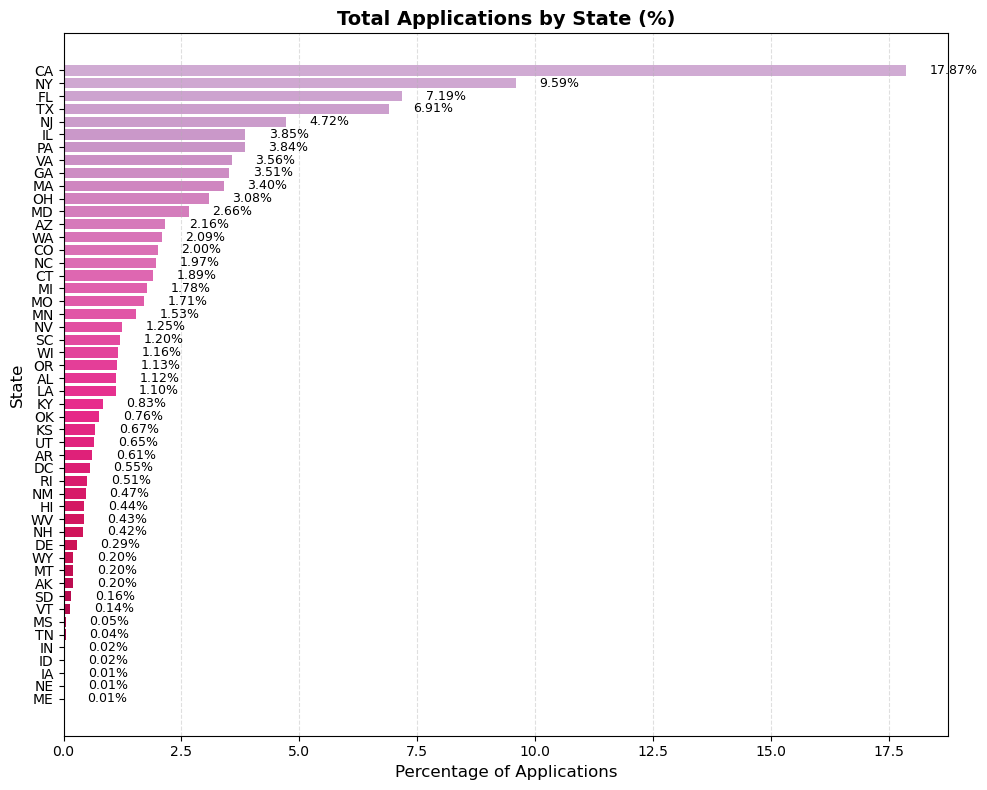

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Step 1: Group and calculate percentage
state_apps = df.groupby('address_state')['id'].count().reset_index()
state_apps = state_apps.sort_values(by='id', ascending=False)
total = state_apps['id'].sum()
state_apps['total_applications'] = (state_apps['id'] / total) * 100

# Step 2: Color gradient
colors = cm.PuRd(np.linspace(0.3, 0.9, len(state_apps)))

# Step 3: Plot
plt.figure(figsize=(10, 8))
bars = plt.barh(state_apps['address_state'], state_apps['total_applications'], color=colors)

# Step 4: Add value labels
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.5, bar.get_y() + bar.get_height()/2,
             f"{width:.2f}%", va='center', fontsize=9, color='black')

# Step 5: Styling
plt.gca().invert_yaxis()  # Top states at top
plt.title("Total Applications by State (%)", fontsize=14, fontweight='bold')
plt.xlabel("Percentage of Applications", fontsize=12)
plt.ylabel("State", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


### Loan Term Anlaysis by State for Total Funded Amount

<Figure size 500x500 with 0 Axes>

([<matplotlib.patches.Wedge at 0x1f3ad1ef610>,
 [Text(-1.0141514017879132, -0.4260245700093025, ' 36 months'),
  Text(1.014151466115822, 0.4260244168766963, ' 60 months')],
 [Text(-0.5531734918843162, -0.23237703818689223, '62.7%\n$273.0M'),
  Text(0.5531735269722664, 0.23237695466001612, '37.3%\n$162.7M')])

Text(0.5, 1.0, 'Total Funded Amount by Term (in $ Millions)')

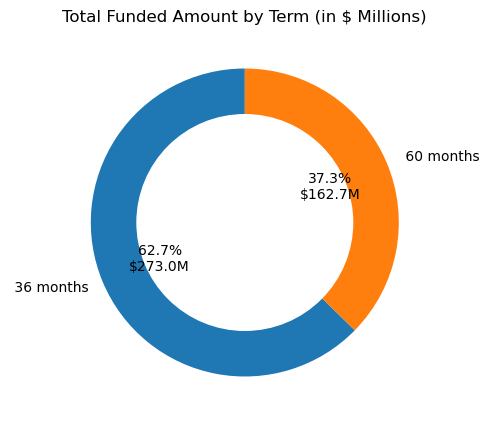

In [72]:
term_funding_millions= df.groupby('term')['loan_amount'].sum()/1000000

plt.figure(figsize =(5,5))
plt.pie(
    term_funding_millions,
    labels = term_funding_millions.index,
    autopct = lambda p : f"{p:.1f}%\n${p*sum(term_funding_millions)/100:.1f}M",
    startangle = 90,
    wedgeprops = {'width':0.4}
)
plt.gca().add_artist(plt.Circle((0,0), 0.70, color ='white'))
plt.title("Total Funded Amount by Term (in $ Millions)")
plt.show()

### Loan Term Anlaysis by State for Total Received Amount

<Figure size 500x500 with 0 Axes>

([<matplotlib.patches.Wedge at 0x1f3af36d810>,
 [Text(-1.0189300162111494, -0.41446546546599894, ' 36 months'),
  Text(1.0189299799774223, 0.41446555454369205, ' 60 months')],
 [Text(-0.555780008842445, -0.22607207207236302, '62.3%\n$294.7M'),
  Text(0.5557799890785938, 0.2260721206601956, '37.7%\n$178.4M')])

Text(0.5, 1.0, 'Total Received Amount by Term (in $ Millions)')

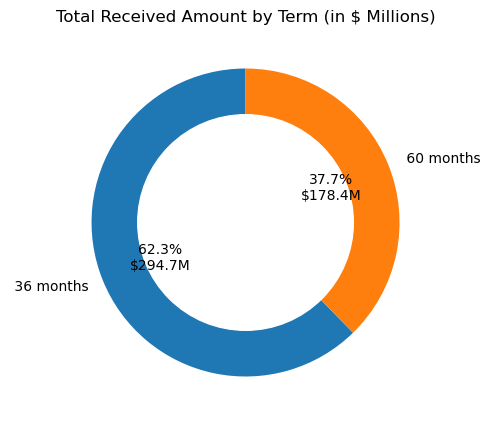

In [74]:
term_received_millions= df.groupby('term')['total_payment'].sum()/1000000

plt.figure(figsize =(5,5))
plt.pie(
    term_received_millions,
    labels = term_received_millions.index,
    autopct = lambda p : f"{p:.1f}%\n${p*sum(term_received_millions)/100:.1f}M",
    startangle = 90,
    wedgeprops = {'width':0.4}
)
plt.gca().add_artist(plt.Circle((0,0), 0.70, color ='white'))
plt.title("Total Received Amount by Term (in $ Millions)")
plt.show()

### Loan Term Anlaysis by State for Total Applications

<Figure size 500x500 with 0 Axes>

([<matplotlib.patches.Wedge at 0x1ea8e170e10>,
 [Text(-0.8205728105779984, -0.7325709948804446, ' 36 months'),
  Text(0.8205725718760264, 0.7325712622569656, ' 60 months')],
 [Text(-0.4475851694061809, -0.39958417902569704, '73.2%\n28237 applications'),
  Text(0.44758503920510523, 0.3995843248674357, '26.8%\n10338 applications')])

Text(0.5, 1.0, 'Total Applications by Term (%)')

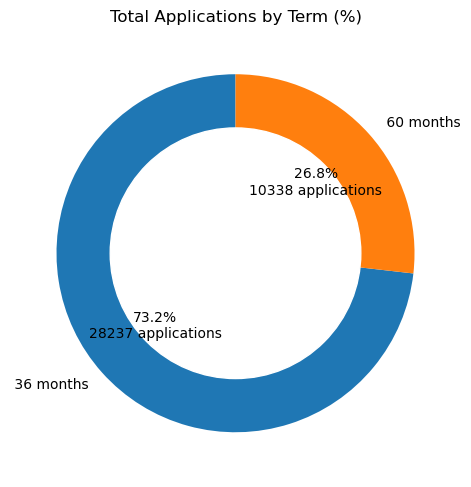

In [49]:
import matplotlib.pyplot as plt

# Step 1: Group and calculate percentage
term_applications = df.groupby('term')['id'].count().reset_index()
total = term_applications['id'].sum()
term_applications['total_applications'] = (term_applications['id'] / total) * 100

# Step 2: Plot donut pie chart
plt.figure(figsize=(5,5))
plt.pie(
    term_applications['total_applications'],
    labels=term_applications['term'],
    autopct = lambda p: f"{p:.1f}%\n{int(p * total / 100)} applications",
    startangle=90,
    wedgeprops={'width': 0.4}
)

# Step 3: Add white circle for donut effect
plt.gca().add_artist(plt.Circle((0, 0), 0.70, color='white'))

plt.title("Total Applications by Term (%)")
plt.tight_layout()
plt.show()


### Employee Length by Total Funded Amount

<Figure size 1000x600 with 0 Axes>

Text(15089.225, 0.0, '$15,084K')

Text(17563.95, 1.0, '$17,559K')

Text(20816.725, 2.0, '$20,812K')

Text(25617.65, 3.0, '$25,613K')

Text(32888.125, 4.0, '$32,883K')

Text(36978.625, 5.0, '$36,974K')

Text(37605.375, 6.0, '$37,600K')

Text(43942.85, 7.0, '$43,938K')

Text(44215.625, 8.0, '$44,211K')

Text(44972.975, 9.0, '$44,968K')

Text(116120.95, 10.0, '$116,116K')

Text(0.5, 0, 'Funded Amount ($ Thousands)')

Text(0.5, 1.0, 'Total Funded Amount by Employment Length')

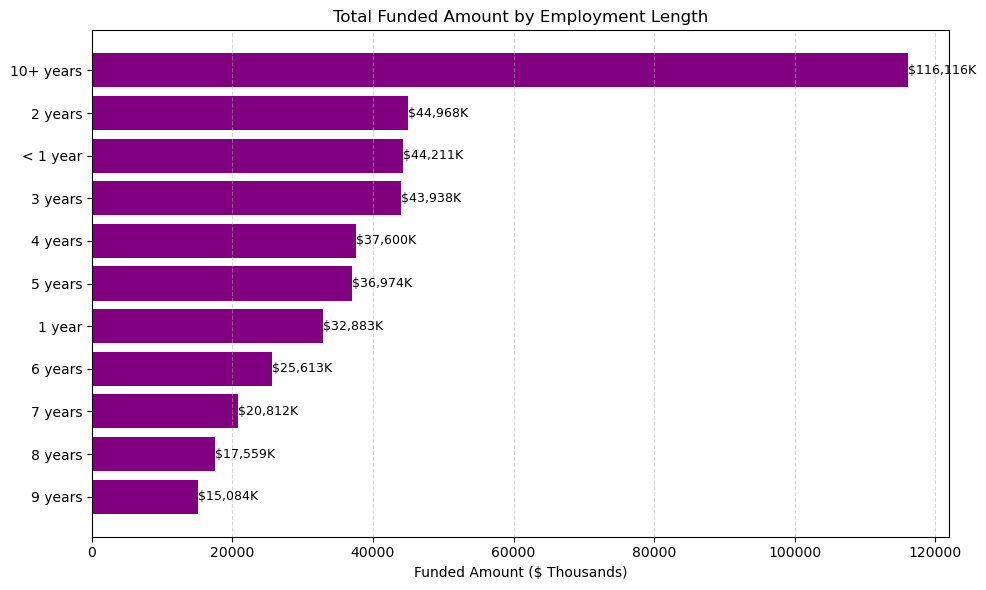

In [42]:
emp_fund = df.groupby('emp_length')['loan_amount'].sum().sort_values()/1000

plt.figure(figsize = (10,6))
bars = plt.barh(emp_fund.index, emp_fund.values, color= 'purple')

for bar in bars:
    width = bar.get_width()
    plt.text(width +5, bar.get_y()+bar.get_height()/2, 
             f"${width:,.0f}K", va='center', fontsize =9)

# - bar.get_y() → bar ka bottom point (niche se start kaha ho raha hai)
# - bar.get_height() → bar ki total height
# - bar.get_height()/2 → us height ka aadha = center

plt.xlabel("Funded Amount ($ Thousands)")
plt.title("Total Funded Amount by Employment Length")
plt.grid(axis="x", linestyle = '--', alpha = 0.5)
plt.tight_layout()
plt.show()

### Purpose by Total Funded Amount

<Figure size 1000x600 with 0 Axes>

Text(5.84575, 0.0, '$0.85M')

Text(6.96795, 1.0, '$1.97M')

Text(7.16165, 2.0, '$2.16M')

Text(8.748125, 3.0, '$3.75M')

Text(9.824925, 4.0, '$4.82M')

Text(10.533225, 5.0, '$5.53M')

Text(14.2258, 6.0, '$9.23M')

Text(15.223575, 7.0, '$10.22M')

Text(22.2516, 8.0, '$17.25M')

Text(29.1231, 9.0, '$24.12M')

Text(36.15575, 10.0, '$31.16M')

Text(38.350775, 11.0, '$33.35M')

Text(63.885175, 12.0, '$58.89M')

Text(237.459675, 13.0, '$232.46M')

Text(0.5, 0, 'Funded Amounnt ($ Millions)')

Text(0.5, 1.0, 'Total Funded Amount by Purpose')

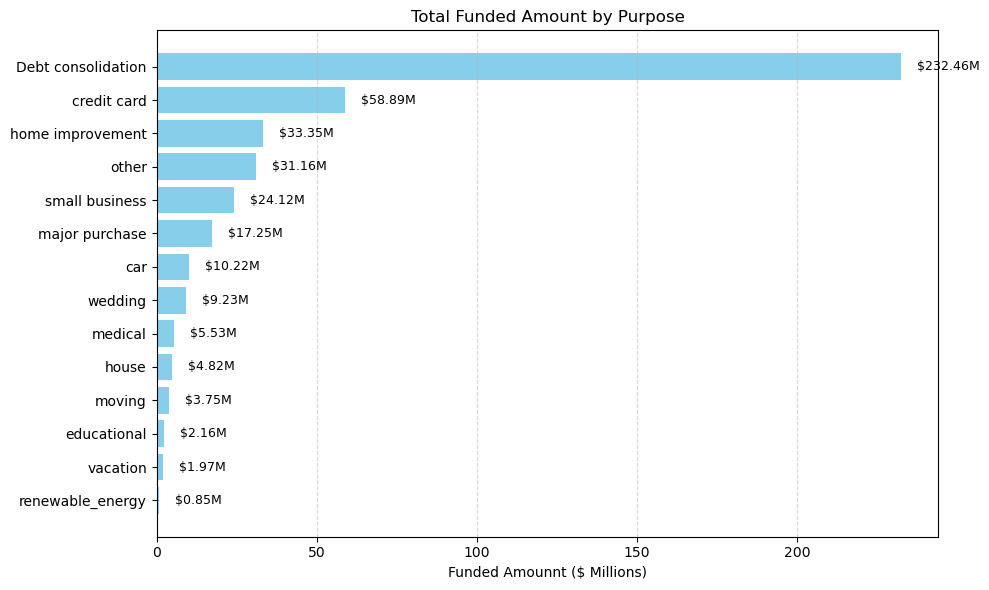

In [18]:
purpose_fund = df.groupby('purpose')['loan_amount'].sum().sort_values()/1000000

plt.figure(figsize = (10,6))

bars  = plt.barh(purpose_fund.index, purpose_fund, color= 'skyblue')

for bar in bars:
    width = bar.get_width()
    plt.text(width+5, bar.get_y() + bar.get_height()/2,
        f"${width:,.2f}M",va= 'center',fontsize = 9)

plt.xlabel("Funded Amounnt ($ Millions)")
plt.title("Total Funded Amount by Purpose")
plt.grid(axis = 'x', linestyle = '--', alpha = 0.5)
plt.tight_layout()
plt.show()

### Purpose by Total Applications

<Figure size 1000x600 with 0 Axes>

Text(1.2436748237245956, 0.0, '0.24%')

Text(1.8165698880132726, 1.0, '0.82%')

Text(1.9124844462878472, 2.0, '0.91%')

Text(1.9487764413106596, 3.0, '0.95%')

Text(2.449087515553712, 4.0, '1.45%')

Text(2.7290543343011198, 5.0, '1.73%')

Text(3.4056408129406885, 6.0, '2.41%')

Text(4.880651182082124, 7.0, '3.88%')

Text(5.6038987971795935, 8.0, '4.60%')

Text(6.46972210700954, 9.0, '5.47%')

Text(8.455412691829117, 10.0, '7.46%')

Text(10.91289921194525, 11.0, '9.91%')

Text(13.956242223143924, 12.0, '12.96%')

Text(48.215885524678555, 13.0, '47.22%')

Text(0.5, 0, 'Total Applications (%)')

Text(0.5, 1.0, 'Total Applications by Purpose')

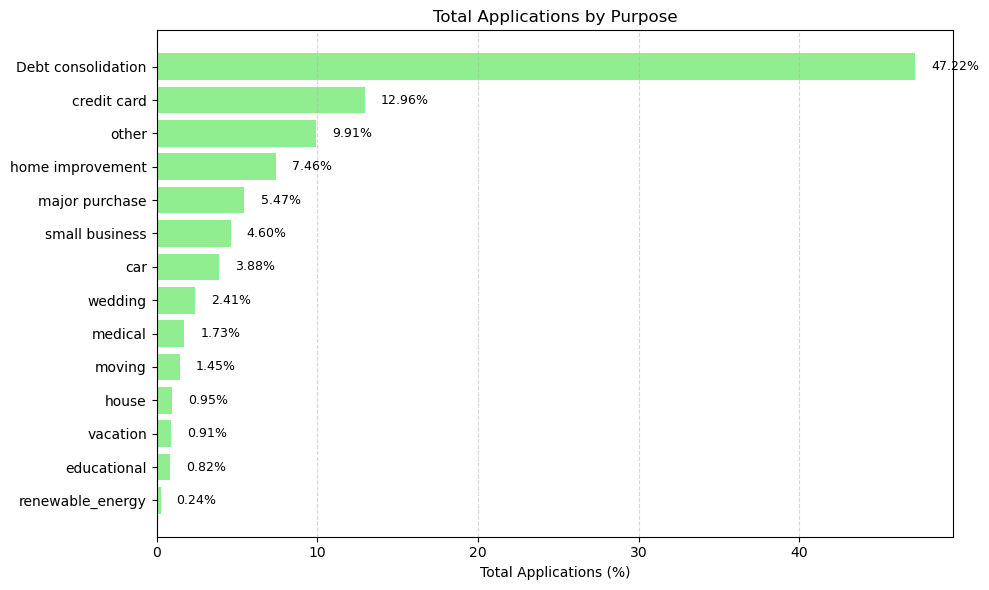

In [40]:
purpose_applications = df.groupby('purpose')['id'].count().sort_values().reset_index()
total = purpose_applications['id'].sum()
purpose_applications['total_applications'] = (purpose_applications['id'] / total) * 100

plt.figure(figsize=(10,6))

bars = plt.barh(purpose_applications['purpose'], purpose_applications['total_applications'], color='lightgreen')

for bar in bars:
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2,
             f"{width:.2f}%", va='center', fontsize=9)

plt.xlabel("Total Applications (%)")
plt.title("Total Applications by Purpose")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### Home Ownership by Total Funded Amount

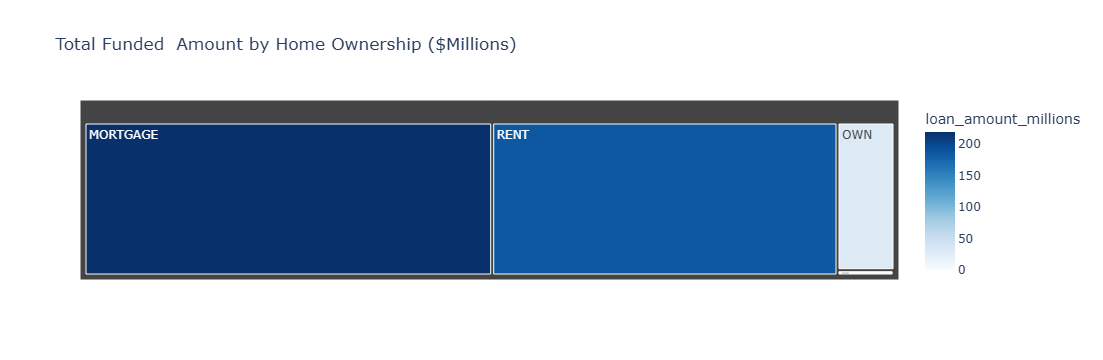

In [25]:
import plotly.express as px

dff = df.groupby('home_ownership')['loan_amount'].sum().sort_values().reset_index()
dff['loan_amount_millions'] = dff['loan_amount'] / 1000000

fig = px.treemap(
    dff,
    path=['home_ownership'],
    values='loan_amount_millions',
    color = 'loan_amount_millions',
    color_continuous_scale ='Blues',
    title = 'Total Funded  Amount by Home Ownership ($Millions)'
)
fig.show()



### Home Ownership by Total Funded Amount

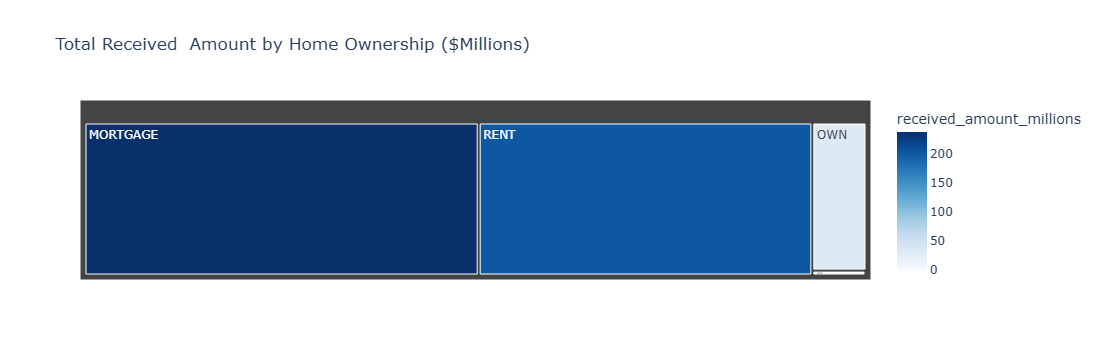

In [28]:
import plotly.express as px

home_received = df.groupby('home_ownership')['total_payment'].sum().sort_values().reset_index()
home_received['received_amount_millions'] = home_received['total_payment'] / 1000000

fig = px.treemap(
    home_received,
    path=['home_ownership'],
    values='received_amount_millions',
    color = 'received_amount_millions',
    color_continuous_scale ='Blues',
    title = 'Total Received  Amount by Home Ownership ($Millions)'
)
fig.show()


### Home Ownership by Total Applications

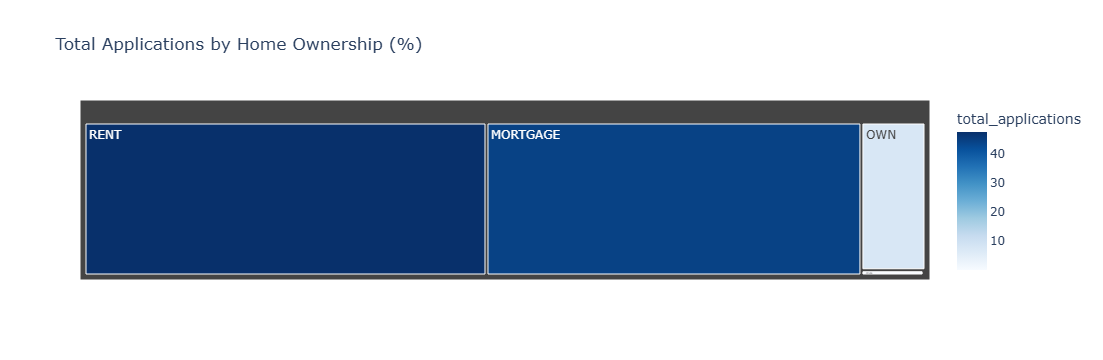

In [37]:
import plotly.express as px

home_applications = df.groupby('home_ownership')['id'].count().sort_values().reset_index()
total = home_applications['id'].sum()
home_applications['total_applications'] = (home_applications['id'] / total) * 100

# Step 2: Format as string with .2f%
home_applications['label'] = home_applications['total_applications'].map(lambda x: f"{x:.2f}%")


fig = px.treemap(
    home_applications,
    path=['home_ownership'],
    values='total_applications',
    color='total_applications',
    color_continuous_scale='Blues',
    title= 'Total Applications by Home Ownership (%)',
    hover_data={'total_applications': False, 'label': True}  # Optional: show formatted % on hover
)

# Step 4: Update labels inside boxes
fig.data[0].texttemplate = "%{label}"

fig.show()